In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Daily, units


In [2]:
# Set time period
N = 30
end = datetime.now()
start = datetime(end.year - N, end.month, end.day)

# Create Point for NYC
nyc = Point(40.7789, -73.9692, 3.0)

# fetch data series
data = Daily(nyc, start, end)
data = data.convert(units.imperial)
data = data.fetch()


In [3]:
data["month"], data["day"] = data.index.month, data.index.day

In [4]:
daily_max_avg = pd.DataFrame(
    data.tmax.groupby(by=[data.month, data.day]).mean())
daily_max_max = pd.DataFrame(
    data.tmax.groupby(by=[data.month, data.day]).max())


In [5]:
daily_max_avg["time"] = daily_max_avg.index.values
daily_max_avg

tmax      time
month day                     
1     1    42.603333    (1, 1)
      2    42.493333    (1, 2)
      3    40.960000    (1, 3)
      4    41.800000    (1, 4)
      5    40.416667    (1, 5)
...              ...       ...
12    27   42.026667  (12, 27)
      28   44.100000  (12, 28)
      29   42.370000  (12, 29)
      30   41.256667  (12, 30)
      31   41.366667  (12, 31)

[366 rows x 2 columns]

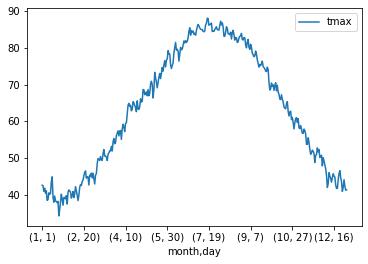

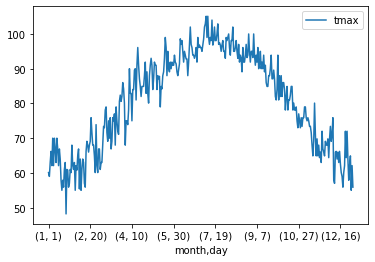

In [6]:
daily_max_avg.plot()
daily_max_max.plot()
plt.show()


In [7]:
# check if today hotter than average
today = end.strftime("%Y-%m-%d")
month, day = end.month, end.day

todays_high = data.tmax.loc[today]
todays_avg_high = daily_max_avg.tmax.loc[(month, day)]
todays_max_high = daily_max_max.tmax.loc[(month, day)]

In [8]:
if todays_high > todays_avg_high:
    print(f"The high today in New York is {todays_high:.1f}°F, {todays_high - todays_avg_high:.1f}°F hotter than today's {N}-year average.")
else:
    print(f"The high today in New York is {todays_high:.1f}°F, {todays_high - todays_avg_high:.1f}°F cooler than today's {N}-year average.")
print(f"The {N}-year historical high for today is {todays_max_high:.1f}°F")


The high today in New York is 84.9°F, 6.6°F hotter than today's 30-year average.
The 30-year historical high for today is 91.4°F
